# Import packages
---
---

In [321]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
%config InlineBackend.figure_format = 'svg'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
import warnings
warnings.filterwarnings('ignore')
import random

#from yellowbrick.regressor import prediction_error

# Get the Data
---

In [2]:
#df=pd.read_csv('/Users/reema/Downloads/hotel_booking.csv')
df = pd.read_csv('hotel_booking.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


# Take a Look at the Data Structure
---

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [4]:
df.shape

(119390, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#Numeric
numerical = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [7]:
#Categorical
categorical = df.loc[:, (df.dtypes != 'int64') & (df.dtypes != 'float64')].columns.tolist()
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [8]:
df[numerical].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df[categorical].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Robert Smith,Michael.C@gmail.com,798-924-6779,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [10]:
# Check classes for prediction
df['is_canceled'].value_counts()#(normalize=True)

0    75166
1    44224
Name: is_canceled, dtype: int64

In [11]:
# Check value counts for catogrical columns
for col in categorical:
    print(f'''Value count column {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count column hotel:
--------------------------------------------------
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column arrival_date_month:
--------------------------------------------------
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Value count column meal:
--------------------------------------------------
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Value count column country:
--------------------------------------------------
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MDG        1
NAM        1
HND        1
LCA        1
KIR        1
Name: country, Length: 177, dtype: int64

Value count column market_segment

In [12]:
# Check Duplicates
df.duplicated().sum()

0

In [13]:
#df.hist(bins=60, figsize=(20,15));

# Split Data
---

In [14]:
total_previous_cancellations = df['previous_cancellations'].unique() 
total_previous_cancellations

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

In [15]:
#train/test split on randomly selected groups of previous_cancellations
np.random.seed(80)
total_previous_cancellations = df['previous_cancellations'].unique() 
test_previous_cancellations = np.random.choice(total_previous_cancellations, size=int(total_previous_cancellations.shape[0] * .20))

In [16]:
df_train, df_test = df[~df['previous_cancellations'].isin(test_previous_cancellations)], df[df['previous_cancellations'].isin(test_previous_cancellations)]

In [17]:
#train/val split on randomly selected groups of previous_cancellations
total_train_previous_cancellations = df_train['previous_cancellations'].unique() 
val_previous_cancellations = np.random.choice(total_train_previous_cancellations, size=int(total_train_previous_cancellations.shape[0] * .25))

In [18]:
df_train, df_val = df_train[~df_train['previous_cancellations'].isin(val_previous_cancellations)], df_train[df_train['previous_cancellations'].isin(val_previous_cancellations)]

In [19]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
# print(f'Shape of test:', df_test.shape)

Shape of train: (119135, 36)
Shape of validation: (154, 36)


# ------------------------------------------

In [20]:
df_train['previous_cancellations'].unique()

array([ 0,  1, 25,  4, 24, 19,  5, 21, 11], dtype=int64)

In [21]:
# df_test['previous_cancellations'].unique()

In [22]:
df_val['previous_cancellations'].unique()

array([ 2, 26, 13], dtype=int64)

# ------------------------------------------

In [23]:
df_train['is_canceled'].value_counts()

0    75027
1    44108
Name: is_canceled, dtype: int64

In [24]:
df_val['is_canceled'].value_counts()

0    79
1    75
Name: is_canceled, dtype: int64

In [25]:
# df_test['is_canceled'].value_counts()

## Data Pre-Processing

---

In [26]:
df_train.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              485
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16180
company         

In [27]:
df_val.isnull().sum()

hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           0
babies                             0
meal                               0
country                            3
market_segment                     0
distribution_channel               0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_canceled     0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
agent                             88
company                           83
days_in_waiting_list               0
customer_type                      0
a

In [28]:
# df_test.isnull().sum()

In [29]:
#Delete Irrelevant Features

# for train
df_train.drop(['name', 'email', 'phone-number', 'credit_card','reservation_status_date'], axis = 1, inplace=True)

# for val
df_val.drop(['name', 'email', 'phone-number', 'credit_card','reservation_status_date'], axis = 1, inplace=True)

# for test
# df_test.drop(['name', 'email', 'phone-number', 'credit_card','reservation_status_date'], axis = 1, inplace=True)


In [30]:
#Remove rows that have no children data

# for train
df_train.dropna(subset=['children'], inplace=True)

# foe val
df_val.dropna(subset=['children'], inplace=True)


# for test
# df_test.dropna(subset=['children'], inplace=True)


In [31]:
#Change value company to 0 and 1

# for train
df_train['company'] = df_train['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_train['company'].value_counts()

# for val
df_val['company'] = df_val['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_val['company'].value_counts()


# for test
# df_test['company'] = df_test['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
# df_test['company'].value_counts()

0    83
1    71
Name: company, dtype: int64

In [32]:
#Change value agent to 0 and 1

# for train
df_train['agent'] = df_train['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_train['agent'].value_counts()

# for val
#Change value agent to 0 and 1
df_val['agent'] = df_val['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_val['agent'].value_counts()

# for test
#Change value agent to 0 and 1
# df_test['agent'] = df_test['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
# df_test['agent'].value_counts()

0    88
1    66
Name: agent, dtype: int64

In [33]:
#Fill NaN value in country with the value of mode

# for train
df_train['country'].fillna(df_train['country'].mode()[0], inplace = True)
df_train['country'].value_counts()

# for val
df_val['country'].fillna(df_val['country'].mode()[0], inplace = True)
df_val['country'].value_counts()

# for test
# df_test['country'].fillna(df_test['country'].mode()[0], inplace = True)
# df_test['country'].value_counts()

PRT    148
ESP      2
GBR      2
FRA      1
ITA      1
Name: country, dtype: int64

In [34]:
df_train.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Handel incorrect value
---

ADR

In [35]:
df_train['adr'].describe()

count    119131.000000
mean        101.916593
std          50.532544
min          -6.380000
25%          69.500000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [36]:
df_train[df_train.adr < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,1,0,0,Transient-Party,-6.38,0,0,Check-Out


In [37]:

# for train
df_train.drop(df_train[df_train['adr'] < 0].index, inplace = True)

# for val
df_val.drop(df_val[df_val['adr'] < 0].index, inplace = True)

# for test
# df_test.drop(df_test[df_test['adr'] < 0].index, inplace = True)

In [38]:
df_train['adr'].describe()

count    119130.000000
mean        101.917502
std          50.531782
min           0.000000
25%          69.500000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Adults


In [39]:
df_train['adults'].describe()

count    119130.000000
mean          1.857290
std           0.579057
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [40]:
# for train
df_train.drop(df_train[df_train['adults']<1].index, inplace= True)

# for val
df_val.drop(df_val[df_val['adults']<1].index, inplace= True)

# for test
# df_test.drop(df_test[df_test['adults']<1].index, inplace= True)

In [41]:
df_train['adults'].describe()

count    118729.000000
mean          1.863563
std           0.569868
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

# Change Type

In [42]:
# for train

# Changing children to integer type: 
df_train['children'] = df_train['children'].astype(int)

# Changing reservation status date to datetime type: 
df_train['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Changing agent to integer type: 
df_train['agent'] = df_train['agent'].astype(int)

# Changing company to integer type: 
df_train['company'] = df_train['company'].astype(int)

In [43]:
# for val

# Changing children to integer type: 
df_val['children'] = df_val['children'].astype(int)

# Changing reservation status date to datetime type: 
df_val['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']) 

# Changing agent to integer type: 
df_val['agent'] = df_val['agent'].astype(int)

# Changing company to integer type: 
df_val['company'] = df_val['company'].astype(int)

In [44]:
# for test

# # Changing children to integer type: 
# df_test['children'] = df_test['children'].astype(int)

# # Changing reservation status date to datetime type: 
# df_test['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# # Changing agent to integer type: 
# df_test['agent'] = df_test['agent'].astype(int)

# # Changing company to integer type: 
# df_test['company'] = df_test['company'].astype(int)

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118729 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118729 non-null  object        
 1   is_canceled                     118729 non-null  int64         
 2   lead_time                       118729 non-null  int64         
 3   arrival_date_year               118729 non-null  int64         
 4   arrival_date_month              118729 non-null  object        
 5   arrival_date_week_number        118729 non-null  int64         
 6   arrival_date_day_of_month       118729 non-null  int64         
 7   stays_in_weekend_nights         118729 non-null  int64         
 8   stays_in_week_nights            118729 non-null  int64         
 9   adults                          118729 non-null  int64         
 10  children                        118729 non-null  int32  

In [46]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 13951 to 94386
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           152 non-null    object        
 1   is_canceled                     152 non-null    int64         
 2   lead_time                       152 non-null    int64         
 3   arrival_date_year               152 non-null    int64         
 4   arrival_date_month              152 non-null    object        
 5   arrival_date_week_number        152 non-null    int64         
 6   arrival_date_day_of_month       152 non-null    int64         
 7   stays_in_weekend_nights         152 non-null    int64         
 8   stays_in_week_nights            152 non-null    int64         
 9   adults                          152 non-null    int64         
 10  children                        152 non-null    int32         
 11  

In [47]:
# df_test.info()

# Feature Engineering
---

Total Stays


In [48]:
# for train
df_train['total_stays'] = df_train['stays_in_weekend_nights'] + df_train['stays_in_week_nights']

# for val
df_val['total_stays'] = df_val['stays_in_weekend_nights'] + df_val['stays_in_week_nights']

# for test
# df_test['total_stays'] = df_test['stays_in_weekend_nights'] + df_test['stays_in_week_nights']

Total Guests

In [49]:
# for train
df_train['total_guests'] = df_train['adults'] + df_train['children'] + df_train['babies']

# for val
df_val['total_guests'] = df_val['adults'] + df_val['children'] + df_val['babies']

# for test
# df_test['total_guests'] = df_test['adults'] + df_test['children'] + df_test['babies']

kids

In [50]:
# for train
df_train['kids'] = df_train['children'] + df_train['babies']

# for val
df_val['kids'] = df_val['children'] + df_val['babies']

# for test
# df_test['kids'] = df_test['children'] + df_test['babies']

Guest location

In [51]:
# for train
df_train['guest_location'] = df_train['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_train['guest_location'].value_counts()

# for val
df_val['guest_location'] = df_val['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_val['guest_location'].value_counts()

# for test
# df_test['guest_location'] = df_test['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
# df_test['guest_location'].value_counts()

Local            146
International      6
Name: guest_location, dtype: int64

In [52]:
# Delete 

# for train
df_train.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies','reservation_status_date'], axis = 1, inplace=True)

# for val
df_val.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies','reservation_status_date'], axis = 1, inplace=True)

# for test
# df_test.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies','reservation_status_date'], axis = 1, inplace=True)


In [53]:
# check Duplicates
df_train.duplicated().sum()


32200

In [54]:
df_val.duplicated().sum()

37

In [55]:
# df_test.duplicated().sum()

In [56]:
# drop Duplicates
# for train
df_train.drop_duplicates(inplace=True)

# for val
df_val.drop_duplicates(inplace=True)

# for test
# df_test.drop_duplicates(inplace=True)


In [57]:
df_train.duplicated().sum()


0

In [58]:
df_train['is_canceled'].value_counts()

0    62913
1    23616
Name: is_canceled, dtype: int64

# Get Dummies 

In [59]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [60]:
df.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

In [61]:
df.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [62]:
df.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [63]:
df1t= df_train.select_dtypes(exclude=['object']).copy()

In [64]:
df_obj_train=df_train.loc[:,['hotel','arrival_date_month','market_segment','distribution_channel','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]
           

In [65]:
df1v= df_val.select_dtypes(exclude=['object']).copy()

In [66]:
df_obj_val=df_val.loc[:,['hotel','arrival_date_month','market_segment','distribution_channel','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]  

In [67]:
# df1ts= df_test.select_dtypes(exclude=['object']).copy()

In [68]:
# df_obj_test=df_test.loc[:,['hotel','arrival_date_month','market_segment','distribution_channel','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]  

In [69]:
df_dum_tr = pd.get_dummies(df_obj_train, drop_first=True)

df_train1 = pd.concat([df1t, df_dum_tr], axis=1)
df_train1.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,guest_location_Local
0,0,342,2015,27,1,2,0,0,0,3,...,0,0,0,0,0,1,0,1,0,1
1,0,737,2015,27,1,2,0,0,0,4,...,0,0,0,0,0,1,0,1,0,1


In [70]:
df_dum_val = pd.get_dummies(df_obj_val, drop_first=True)

df_val1 = pd.concat([df1v, df_dum_val], axis=1)
df_val1.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,deposit_type_Non Refund,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,guest_location_Local
13951,0,4,2015,44,30,2,0,2,2,1,...,1,0,0,0,0,0,1,0,1,1
13952,0,0,2015,51,15,1,0,2,3,0,...,0,0,0,0,0,0,1,0,1,1


In [71]:
# df_dum_test = pd.get_dummies(df_obj_test, drop_first=True)

# df_test1 = pd.concat([df1ts, df_dum_test], axis=1)
# df_test1.head(2)

In [72]:
#sns.heatmap(df_train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


In [73]:
df_train1.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,guest_location_Local
is_canceled,1.000000,0.181250,0.090144,0.000795,0.005554,0.082702,-0.088557,0.055799,-0.057480,-0.092040,...,-0.022181,0.005549,0.164473,-0.002365,-0.030969,0.132695,-0.115126,-1.000000,0.177288,0.117668
lead_time,0.181250,1.000000,0.140541,0.100833,0.009219,0.143333,-0.143621,0.009554,-0.082859,0.081832,...,-0.019654,-0.003158,0.167595,0.026877,-0.025686,-0.161812,0.150541,-0.181250,-0.033420,-0.122756
arrival_date_year,0.090144,0.140541,1.000000,-0.513827,-0.010049,0.039394,0.025261,-0.059339,0.027591,0.008556,...,0.006192,-0.005999,-0.016565,-0.001709,-0.017239,0.168888,-0.092806,-0.090144,-0.012205,-0.176638
arrival_date_week_number,0.000795,0.100833,-0.513827,1.000000,0.092963,0.025121,-0.037080,0.012109,-0.020881,0.012793,...,0.005522,0.000537,0.003355,-0.013984,0.013128,-0.059771,0.013766,-0.000795,-0.018770,0.022324
arrival_date_day_of_month,0.005554,0.009219,-0.010049,0.092963,1.000000,-0.000541,-0.002993,-0.006816,0.001341,0.006865,...,-0.005910,0.000456,0.002746,0.028540,-0.001635,0.004486,0.005847,-0.005554,0.003753,0.010816
adults,0.082702,0.143333,0.039394,0.025121,-0.000541,1.000000,-0.164243,-0.031875,-0.128859,-0.035912,...,-0.007659,0.000632,-0.030716,-0.000939,0.067046,0.092819,-0.124304,-0.082702,-0.028617,-0.132867
is_repeated_guest,-0.088557,-0.143621,0.025261,-0.037080,-0.002993,-0.164243,1.000000,0.165454,0.470877,0.006125,...,0.041166,-0.000668,-0.015150,0.000040,0.104147,0.017224,-0.027883,0.088557,0.003129,0.219396
previous_cancellations,0.055799,0.009554,-0.059339,0.012109,-0.006816,-0.031875,0.165454,1.000000,0.298513,-0.012999,...,-0.002625,0.010435,0.090204,-0.002594,-0.000284,-0.016776,0.005086,-0.055799,-0.006653,0.091690
previous_bookings_not_canceled,-0.057480,-0.082859,0.027591,-0.020881,0.001341,-0.128859,0.470877,0.298513,1.000000,0.001411,...,-0.005062,0.004695,0.000089,-0.003253,0.026295,0.025152,-0.022607,0.057480,-0.005239,0.149361
booking_changes,-0.092040,0.081832,0.008556,0.012793,0.006865,-0.035912,0.006125,-0.012999,0.001411,1.000000,...,0.007126,-0.001285,-0.027874,0.023684,0.000279,-0.143778,0.178901,0.092040,-0.002919,-0.004417


In [74]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86529 entries, 0 to 119389
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     86529 non-null  int64  
 1   lead_time                       86529 non-null  int64  
 2   arrival_date_year               86529 non-null  int64  
 3   arrival_date_week_number        86529 non-null  int64  
 4   arrival_date_day_of_month       86529 non-null  int64  
 5   adults                          86529 non-null  int64  
 6   is_repeated_guest               86529 non-null  int64  
 7   previous_cancellations          86529 non-null  int64  
 8   previous_bookings_not_canceled  86529 non-null  int64  
 9   booking_changes                 86529 non-null  int64  
 10  agent                           86529 non-null  int32  
 11  company                         86529 non-null  int32  
 12  days_in_waiting_list           

# EDA

In [75]:
# plt.figure(figsize=(15, 25))
# for i in range(0, len(numerical)):
#     plt.subplot(10, int(len(numerical)/9), i+1)
#     sns.distplot(df_train[numerical[i]], color='gray')
#     plt.tight_layout()

In [76]:
df_train.shape

(86529, 31)

In [77]:
df_val.shape

(115, 31)

In [78]:
df_test.shape

(101, 36)

In [79]:
# train_sample= df_train1[['is_canceled','lead_time','previous_cancellations','previous_bookings_not_canceled',
#                            'assigned_room_type_K','assigned_room_type_L','deposit_type_Non Refund','deposit_type_Refundable',
#                            'customer_type_Group','customer_type_Transient','customer_type_Transient-Party',
#                            'reservation_status_Check-Out','reservation_status_No-Show','guest_location_Local',
#                            'hotel_Resort Hotel','market_segment_Complementary','market_segment_Corporate',
#                            'market_segment_Direct','market_segment_Groups','market_segment_Offline TA/TO',
#                            'market_segment_Online TA','distribution_channel_Direct','distribution_channel_GDS',
#                            'distribution_channel_TA/TO','distribution_channel_Undefined','assigned_room_type_B',
#                            'assigned_room_type_C','assigned_room_type_D','assigned_room_type_E','assigned_room_type_F',
#                            'assigned_room_type_G','assigned_room_type_H','assigned_room_type_I','assigned_room_type_K',
#                            'assigned_room_type_L','deposit_type_Non Refund','deposit_type_Refundable','customer_type_Group',
#                            'customer_type_Transient','customer_type_Transient-Party','reservation_status_Check-Out',
#                            'reservation_status_No-Show'
#                            ]]







# val_sample = df_val1[['is_canceled','lead_time','previous_cancellations','previous_bookings_not_canceled',
#                            'assigned_room_type_K','assigned_room_type_L','deposit_type_Non Refund','deposit_type_Refundable',
#                            'customer_type_Group','customer_type_Transient','customer_type_Transient-Party',
#                            'reservation_status_Check-Out','reservation_status_No-Show','guest_location_Local',
#                            'hotel_Resort Hotel','market_segment_Complementary','market_segment_Corporate',
#                            'market_segment_Direct','market_segment_Groups','market_segment_Offline TA/TO',
#                            'market_segment_Online TA','distribution_channel_Direct','distribution_channel_GDS',
#                            'distribution_channel_TA/TO','distribution_channel_Undefined','assigned_room_type_B',
#                            'assigned_room_type_C','assigned_room_type_D','assigned_room_type_E','assigned_room_type_F',
#                            'assigned_room_type_G','assigned_room_type_H','assigned_room_type_I','assigned_room_type_K',
#                            'assigned_room_type_L','deposit_type_Non Refund','deposit_type_Refundable','customer_type_Group',
#                            'customer_type_Transient','customer_type_Transient-Party','reservation_status_Check-Out',
#                            'reservation_status_No-Show'
#                            ]]
    
    
    
    
    
    
    
#     'hotel_Resort Hotel','is_canceled','lead_time','previous_cancellations','distribution_channel_Direct',
#                       'distribution_channel_TA/TO','market_segment_Complementary','market_segment_Corporate',
#                       'market_segment_Direct',
#                       'market_segment_Groups','market_segment_Offline TA/TO','market_segment_Online TA',
#                       'deposit_type_Non Refund','previous_bookings_not_canceled','customer_type_Group','customer_type_Transient',
#                       'customer_type_Transient-Party','assigned_room_type_B','assigned_room_type_C',
#                       'assigned_room_type_D','assigned_room_type_E','assigned_room_type_F','assigned_room_type_G',
#                       'assigned_room_type_H'
#                      ]]
    
                          

# test_sample = df_test1[['is_canceled','lead_time','previous_cancellations','previous_bookings_not_canceled',
#                         'hotel_Resort Hotel','market_segment_Direct',
#                       'market_segment_Groups','market_segment_Offline TA/TO','market_segment_Online TA',
#                         'market_segment_Corporate','distribution_channel_Direct','distribution_channel_TA/TO',
#                         'assigned_room_type_B','assigned_room_type_D','assigned_room_type_E','assigned_room_type_F',
#                         'assigned_room_type_G','deposit_type_Non Refund','reservation_status_Check-Out',
#                         'reservation_status_No-Show','customer_type_Transient-Party']]
    
    
   

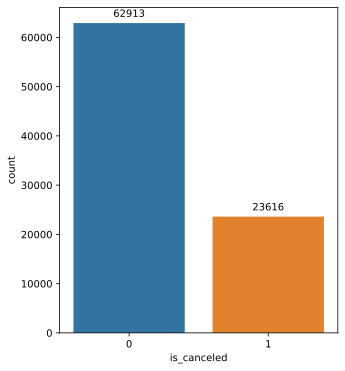

In [80]:
# Classes
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(df_train['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Cancellation Rate

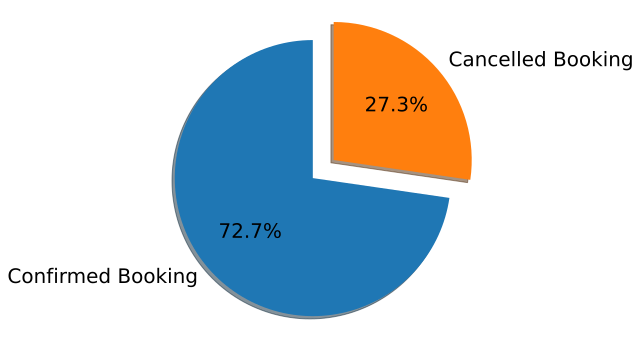

In [81]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df_train['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal'); 

---
## What is the month in which there were the most cancellations, and what is the month in which there were the least cancellations?

In [82]:
# plt.figure(figsize=(10, 10))
# sns.barplot(df_train['arrival_date_month'], df_clean['is_canceled'], color='steelblue')

# plt.xlabel('arrival_date_month', fontsize=12)
# plt.ylabel('is_canceled', fontsize=12)
# plt.title('Cancellation Rate By Months', fontsize=20, pad=30)
# plt.show()

# Select what year was the most reservation in?

In [83]:
counts_year = df_train.arrival_date_year.value_counts().sort_values(ascending=False).reset_index()
counts_year.columns = ['year', 'count']
counts_year

,year,count
0,2016,41934
1,2017,31422
2,2015,13173


Text(0.5, 1.0, 'The Most reservation  year')

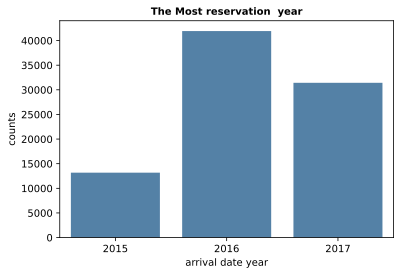

In [84]:
sns.barplot(x = 'year', y = 'count', data = counts_year , color = '#4682B4')
plt.xlabel('arrival date year')
plt.ylabel('counts')
plt.title('The Most reservation  year',fontsize =10,weight='bold',color='black')

# What is the cancellation rate for each hotel?

In [85]:
Most_hotel_cancellation = df_train.groupby('hotel').is_canceled.sum()
Most_hotel_cancellation

hotel
City Hotel      15760
Resort Hotel     7856
Name: is_canceled, dtype: int64

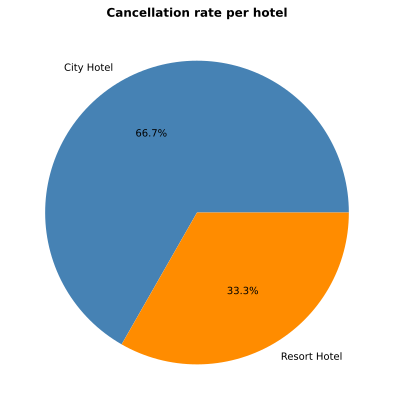

In [86]:
fig = plt.figure(figsize =(7,7))
c = ['#4682B4','darkorange']
plt.title('Cancellation rate per hotel', fontsize = 12, weight = 'bold')
plt.pie(Most_hotel_cancellation , labels=Most_hotel_cancellation.index,autopct="%0.1f%%", pctdistance=0.6 ,colors=c);

# Is the number of changes of the reservation affected by (market_segment)?

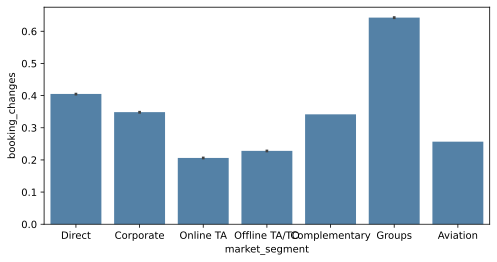

In [87]:
plt.figure(figsize=(8,4))
sns.barplot(y=df_train.booking_changes,x=df_train.market_segment
            ,ci=True,color='steelblue')
plt.ylabel('booking_changes')
plt.xlabel('market_segment');


# Is booking changes affected by customer type or by days in waiting list?

In [88]:
#plt.bar(df_train.booking_changes,df_train.days_in_waiting_list);

In [89]:
#plt.bar(df_train.booking_changes,df_train.customer_type);

---
## Scaler

In [90]:
# scaler = StandardScaler()

# train_sample[train_sample.columns]=scaler.fit_transform(train_sample[train_sample.columns])
# val_sample[val_sample.columns]=scaler.transform(val_sample[val_sample.columns])
# test_sample[test_sample.columns]=scaler.transform(test_sample[test_sample.columns])

---

## KNN Model

In [94]:
X_train.shape

(86529, 59)

In [95]:
y_train.shape

(86529,)

In [96]:
X_val.shape

(115, 52)

In [97]:
y_val.shape

(115,)

In [99]:
X_train=df_train1.drop(['is_canceled'], axis=1)
y_train=df_train1['is_canceled']
X_val=df_val1.drop(['is_canceled'], axis=1)
y_val=df_val1['is_canceled']
# X_test=test_sample.drop(['is_canceled'], axis=1)
# y_test=df_test1['is_canceled']

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pre=knn.predict(X_val)

In [101]:
print('The accuracy for training : ',knn.score(X_train,y_train))
print('f1_score for train: ',f1_score(knn.predict(X_train), y_train))

The accuracy for training :  0.8168244172473969
f1_score for train:  0.6092594418696381


In [102]:
print('The accuracy for validation: ',knn.score(X_val,y_val))
print('f1_score for validation: ',f1_score(knn.predict(y_val), y_pre))

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 51 while Y.shape[1] == 58